> ## Import the libraries and read the data

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [10]:
df = pd.read_csv(r'C:\Users\ADITHYA VEDHAMANI\Downloads\BTC-USD (1).csv',index_col = ['Date'], parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372
2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331
2022-01-11,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,26327648900
2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689


> ## Data Preprocessing, Cleansing, Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-01-08 to 2023-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


df.isnull()

In [12]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,27692.511073,28221.225351,27056.603670,27625.842096,27625.842096,2.943329e+10
std,10043.240134,10266.941262,9793.189647,10032.867726,10032.867726,1.251842e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.611723e+09
25%,19413.669922,19668.903321,19074.460449,19390.565918,19390.565918,2.169118e+10
50%,22666.909179,23205.661133,22072.083985,22620.060547,22620.060547,2.774836e+10
75%,38516.523438,39532.308594,37720.593750,38479.617188,38479.617188,3.392006e+10
max,47456.898438,48086.835938,47100.437500,47465.730469,47465.730469,1.189925e+11


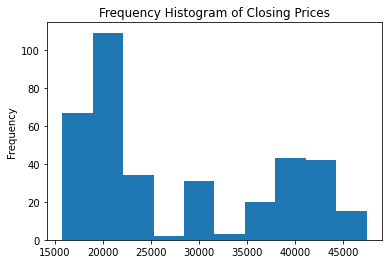

In [14]:
plt.hist(df['Close'], bins=10)
plt.gca().set(title='Frequency Histogram of Closing Prices', ylabel='Frequency')
plt.show()

In [15]:
df[df['Close'] < 20000].count()

Open         116
High         116
Low          116
Close        116
Adj Close    116
Volume       116
dtype: int64

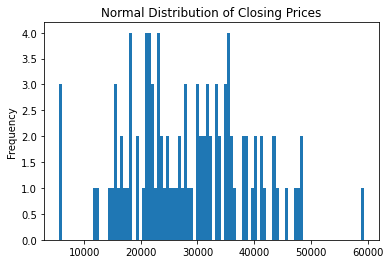

In [16]:
x = np.random.normal(df['Close'].mean(), df['Close'].std(), 100)
plt.gca().set(title='Normal Distribution of Closing Prices', ylabel='Frequency')
plt.hist(x, 100)
plt.show()

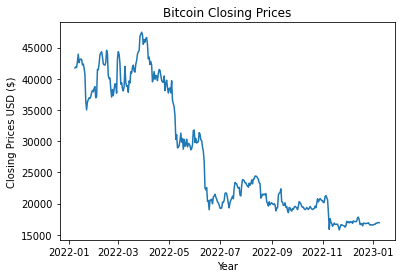

In [17]:
plt.plot(df.index,df['Close'])
plt.gca().set(title='Bitcoin Closing Prices', xlabel='Year', ylabel='Closing Prices USD ($)')
plt.show()

In [18]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = df.index,
                                        open = df["Open"], 
                                        high = df["High"],
                                        low = df["Low"], 
                                        close = df["Close"])])
figure.update_layout(title = "Bitcoin - Candlestick Chart", xaxis_title='Year',yaxis_title='Close Price USD ($)',
                     xaxis_rangeslider_visible = False)
figure.show()

ModuleNotFoundError: No module named 'plotly'

In [19]:
import plotly.express as px
date_start = '2022-01-01'
date_end = '2023-01-01'
figure = px.line(df, x = df.index, 
                 y = 'Close', 
                 range_x = [date_start,date_end], 
                 title = "Bitcoin Analysis {} to {}".format(date_start, date_end))
figure.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

<AxesSubplot: title={'center': 'Bitcoin Close Prices'}, xlabel='Date'>

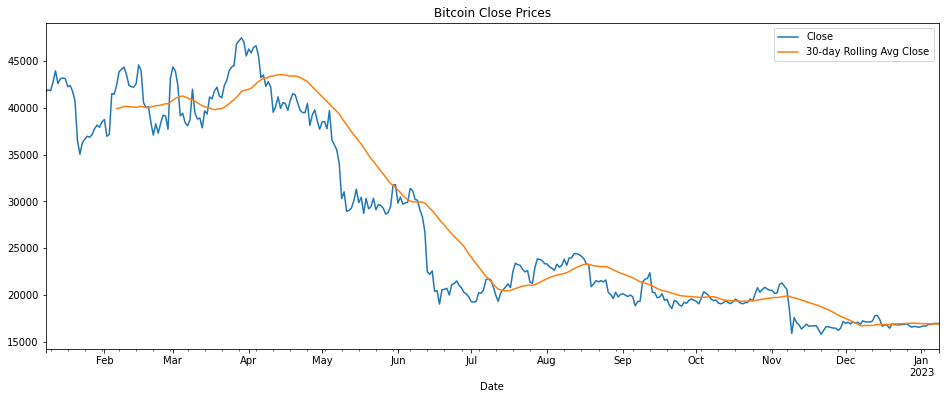

In [20]:
df['Close'].plot(title='Bitcoin Close Prices',label='Close',legend=True)
df.rolling(30).mean()['Close'].plot(figsize=(16,6), label='30-day Rolling Avg Close', legend=True)

In [454]:
df1 = pd.read_csv('/kaggle/input/crypto/BTC-USD.csv')
fig = go.Figure()

fig.add_trace(go.Scatter(x=df1.Date, y=df1.Close, name='Close',  marker_color='Red'))
fig.add_trace(go.Scatter(x=df1.Date, y=df1.Open, name='Open' , marker_color='Green'))
fig.add_trace(go.Scatter(x=df1.Date, y=df1.High, mode='lines', name='High', marker_color='Yellow')) 
fig.add_trace(go.Scatter(x=df1.Date, y=df1.Low, name='Low', marker_color='Violet') )

fig.show()

In [455]:
data = pd.read_csv('/kaggle/input/crypto/BTC-USD.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [456]:
from itertools import cycle
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(data, x=data.Date, y=[data['Open'], data['Close'], 
                                          data['High'], data['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [21]:
monthvise= data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

NameError: name 'data' is not defined

In [458]:
data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = data.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [459]:
data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = data.groupby(data['Date'].dt.strftime('%B'))['Open'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = data.groupby(data['Date'].dt.strftime('%B'))['Close'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock open Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock close Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise open and close stock price')
fig.show()

> ## Train - Test Split

In [22]:
import math

#Only using the prices from the Close column in our dataset
close_prices = df.filter(['Close'])

close_price_df = close_prices.values

training_len = math.ceil(len(close_price_df) * 0.80)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(close_price_df)

In [24]:
train_data = scaled_data[0: training_len, :]

In [25]:
x_train = [] 
y_train = [] 

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i,0]) 

In [26]:
print('Length of list (x_train): ',len(x_train))
print('Length of list (y_train): ', len(y_train))

Length of list (x_train):  233
Length of list (y_train):  233


In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

> ## Building the LSTM Model

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
233/233 [==============================] - 10s 21ms/step - loss: 0.0082
Epoch 2/100
233/233 [==============================] - 4s 18ms/step - loss: 0.0051
Epoch 3/100
233/233 [==============================] - 4s 17ms/step - loss: 0.0045
Epoch 4/100
233/233 [==============================] - 4s 17ms/step - loss: 0.0032
Epoch 5/100
233/233 [==============================] - 5s 22ms/step - loss: 0.0028
Epoch 6/100
233/233 [==============================] - 5s 23ms/step - loss: 0.0026
Epoch 7/100
233/233 [==============================] - 5s 21ms/step - loss: 0.0032
Epoch 8/100
233/233 [==============================] - 6s 24ms/step - loss: 0.0021
Epoch 9/100
233/233 [==============================] - 5s 23ms/step - loss: 0.0017
Epoch 10/100
233/233 [==============================] - 4s 18ms/step - loss: 0.0018
Epoch 11/100
233/233 [==============================] - 4s 18ms/step - loss: 0.0023
Epoch 12/100
233/233 [==============================] - 4s 19ms/step - loss: 0.0017


In [31]:
test_data = scaled_data[training_len-60:,:]

x_test = []

y_test = close_price_df[training_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

> ## Predict the model

In [32]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
predictions[:5]

3/3 [==============================] - 1s 14ms/step


array([[20086.033],
       [20157.152],
       [20519.805],
       [20361.062],
       [20138.861]], dtype=float32)

> ## RMSE

In [33]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print(rmse)

562.868666860206


> ## Visualizing Predictions Vs Actuals

In [34]:
data  = df.filter(['Close'])

train = data[:training_len]
valuation = data[training_len:]

valuation['Predictions'] = predictions

valuation.head()

C:\Users\ADITHYA VEDHAMANI\AppData\Local\Temp\ipykernel_41488\4084079476.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predictions
Date,,
2022-10-28,20595.351563,20086.033203
2022-10-29,20818.476563,20157.152344
2022-10-30,20635.603516,20519.804688
2022-10-31,20495.773438,20361.062500
2022-11-01,20485.273438,20138.861328


In [35]:
train.head(2)

,Close
Date,
2022-01-08,41733.941406
2022-01-09,41911.601563


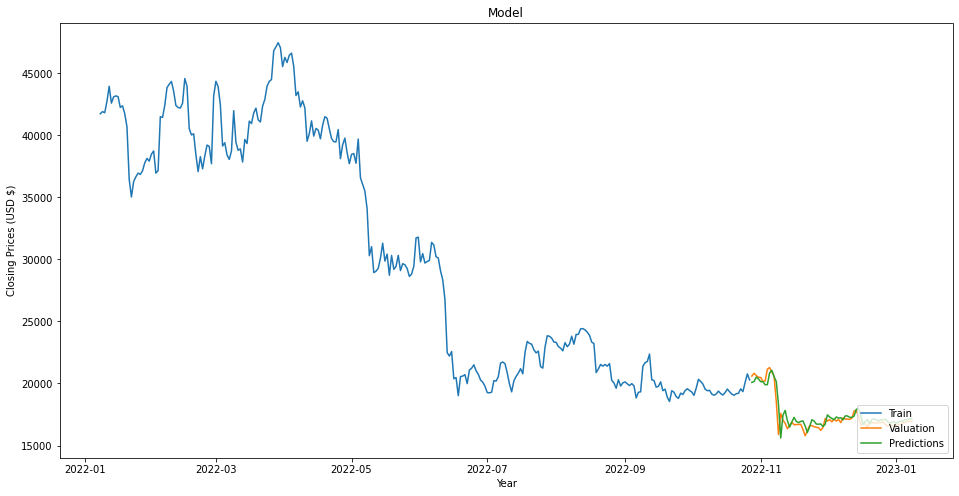

In [36]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Year')
plt.ylabel('Closing Prices (USD $)')
plt.plot(train)

plt.plot(valuation[['Close','Predictions']])
plt.legend(['Train','Valuation','Predictions'], loc='lower right')
plt.show()

> ## Training and Predicting Using Random Forest

In [475]:
df = pd.read_csv('/kaggle/input/crypto/BTC-USD.csv',index_col = ['Date'], parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372
2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331
2022-01-11,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,26327648900
2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689


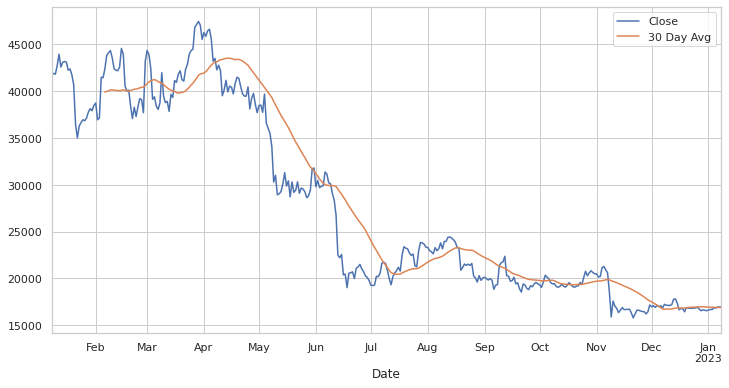

In [476]:
# Plotting the rolling 30 day average against the Close Price
sns.set()
sns.set_style('whitegrid')
df['Close'].plot(figsize=(12,6),label='Close')
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [477]:
df['ohlc_average'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

In [478]:
df['Price_After_Month']=df['Close'].shift(-30)

In [479]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ohlc_average,Price_After_Month
Date,,,,,,,,
2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845,41549.156250,43840.285156
2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372,41912.109375,44118.445313
2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331,41431.886719,44338.796875
2022-01-11,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,26327648900,42241.068360,43565.113281
2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689,43338.909180,42407.937500


In [480]:
df.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
ohlc_average         float64
Price_After_Month    float64
dtype: object

In [481]:
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)
y=df['Price_After_Month']

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



In [482]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [483]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)

Accuracy is: 89.1169 %


In [484]:
preds = reg.predict(X_test)

In [485]:
X_30=X[-30:]
forecast=reg.predict(X_30)

In [486]:
from datetime import datetime, timedelta
last_date=df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df=df.append(df1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,ohlc_average,Price_After_Month,Forecast
2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,2.806636e+10,41549.156250,43840.285156,NaN
2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,2.129438e+10,41912.109375,44118.445313,NaN
2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,3.210423e+10,41431.886719,44338.796875,NaN
2022-01-11,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,2.632765e+10,42241.068360,43565.113281,NaN
2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,3.349994e+10,43338.909180,42407.937500,NaN


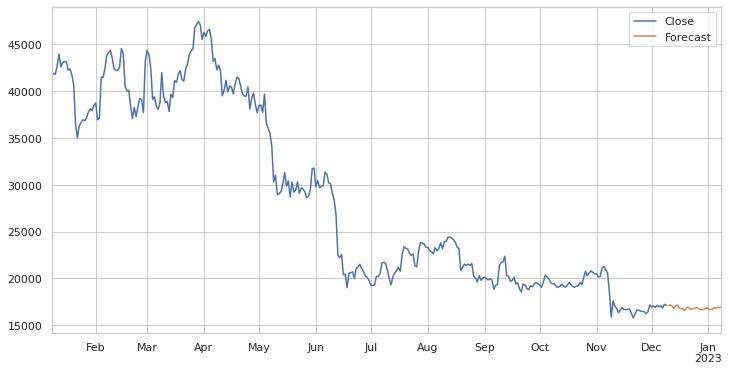

In [487]:
df['Close'].plot(figsize=(12,6),label='Close')
df['Forecast'].plot()
plt.legend()

In [37]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-10 13:21:18         3059
metadata.json                                  2023-01-10 13:21:18           64
variables.h5                                   2023-01-10 1